# Anomaly Detection

In [ ]:
!pip install pycaret[full]

In [ ]:
import pycaret
pycaret.__version__

'3.3.2'

In [ ]:
from pycaret.datasets import get_data
data = get_data('anomaly')

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10
0,0.263995,0.764929,0.138424,0.935242,0.605867,0.518790,0.912225,0.608234,0.723782,0.733591
1,0.546092,0.653975,0.065575,0.227772,0.845269,0.837066,0.272379,0.331679,0.429297,0.367422
2,0.336714,0.538842,0.192801,0.553563,0.074515,0.332993,0.365792,0.861309,0.899017,0.088600
3,0.092108,0.995017,0.014465,0.176371,0.241530,0.514724,0.562208,0.158963,0.073715,0.208463
4,0.325261,0.805968,0.957033,0.331665,0.307923,0.355315,0.501899,0.558449,0.885169,0.182754


In [ ]:
from pycaret.anomaly import *
s = setup(data, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(1000, 10)"
2,Transformed data shape,"(1000, 10)"
3,Numeric features,10
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [ ]:
from pycaret.anomaly import AnomalyExperiment
exp = AnomalyExperiment()

In [ ]:
type(exp)

pycaret.anomaly.oop.AnomalyExperiment

In [ ]:
exp.setup(data, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(1000, 10)"
2,Transformed data shape,"(1000, 10)"
3,Numeric features,10
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [ ]:
iforest = create_model('iforest')
iforest

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0)

In [ ]:
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pycaret.internal.patches.pyod.CBLOFForceToDouble
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


In [ ]:
iforest_anomalies = assign_model(iforest)
iforest_anomalies

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Anomaly,Anomaly_Score
0,0.263995,0.764929,0.138424,0.935242,0.605867,0.518790,0.912225,0.608234,0.723782,0.733591,0,-0.035865
1,0.546092,0.653975,0.065575,0.227772,0.845269,0.837066,0.272379,0.331679,0.429297,0.367422,0,-0.084927
2,0.336714,0.538842,0.192801,0.553563,0.074515,0.332993,0.365792,0.861309,0.899017,0.088600,1,0.025356
3,0.092108,0.995017,0.014465,0.176371,0.241530,0.514724,0.562208,0.158963,0.073715,0.208463,1,0.042415
4,0.325261,0.805968,0.957033,0.331665,0.307923,0.355315,0.501899,0.558449,0.885169,0.182754,0,-0.023408
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.305055,0.656837,0.331665,0.822525,0.907127,0.882276,0.855732,0.584786,0.808640,0.242762,0,-0.083981
996,0.812627,0.864258,0.616604,0.167966,0.811223,0.938071,0.418462,0.472306,0.348347,0.671129,0,-0.075839
997,0.250967,0.138627,0.919703,0.461234,0.886555,0.869888,0.800908,0.530324,0.779433,0.234952,0,-0.052903
998,0.502436,0.936820,0.580062,0.540773,0.151995,0.059452,0.225220,0.242755,0.279385,0.538755,0,-0.075104


In [ ]:
plot_model(iforest, plot = 'tsne')

In [ ]:
evaluate_model(iforest)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
iforest_pred = predict_model(iforest, data=data)
iforest_pred

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Anomaly,Anomaly_Score
0,0.263995,0.764929,0.138424,0.935242,0.605867,0.518790,0.912225,0.608234,0.723782,0.733591,0,-0.035865
1,0.546092,0.653975,0.065575,0.227772,0.845269,0.837066,0.272379,0.331679,0.429297,0.367422,0,-0.084927
2,0.336714,0.538842,0.192801,0.553563,0.074515,0.332993,0.365792,0.861309,0.899017,0.088600,1,0.025356
3,0.092108,0.995017,0.014465,0.176371,0.241530,0.514724,0.562208,0.158963,0.073715,0.208463,1,0.042415
4,0.325261,0.805968,0.957033,0.331665,0.307923,0.355315,0.501899,0.558449,0.885169,0.182754,0,-0.023408
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.305055,0.656837,0.331665,0.822525,0.907127,0.882276,0.855732,0.584786,0.808640,0.242762,0,-0.083981
996,0.812627,0.864258,0.616604,0.167966,0.811223,0.938071,0.418462,0.472306,0.348347,0.671129,0,-0.075839
997,0.250967,0.138627,0.919703,0.461234,0.886555,0.869888,0.800908,0.530324,0.779433,0.234952,0,-0.052903
998,0.502436,0.936820,0.580062,0.540773,0.151995,0.059452,0.225220,0.242755,0.279385,0.538755,0,-0.075104


In [ ]:
s = setup(data, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(1000, 10)"
2,Transformed data shape,"(1000, 10)"
3,Numeric features,10
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [ ]:
get_config()

{'USI',
 'X',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables'}

In [ ]:
get_config('X_train_transformed')

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10
0,0.263995,0.764929,0.138424,0.935242,0.605867,0.518790,0.912225,0.608234,0.723782,0.733591
1,0.546092,0.653975,0.065575,0.227772,0.845269,0.837066,0.272379,0.331679,0.429297,0.367422
2,0.336714,0.538842,0.192801,0.553563,0.074515,0.332993,0.365792,0.861309,0.899017,0.088600
3,0.092108,0.995017,0.014465,0.176371,0.241530,0.514724,0.562208,0.158963,0.073715,0.208463
4,0.325261,0.805968,0.957033,0.331665,0.307923,0.355315,0.501899,0.558449,0.885169,0.182754
...,...,...,...,...,...,...,...,...,...,...
995,0.305055,0.656837,0.331665,0.822525,0.907127,0.882276,0.855732,0.584786,0.808640,0.242762
996,0.812627,0.864258,0.616604,0.167966,0.811223,0.938071,0.418462,0.472306,0.348347,0.671129
997,0.250967,0.138627,0.919703,0.461234,0.886555,0.869888,0.800908,0.530324,0.779433,0.234952
998,0.502436,0.936820,0.580062,0.540773,0.151995,0.059452,0.225220,0.242755,0.279385,0.538755


In [ ]:
print("The current seed is: {}".format(get_config('seed')))

set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


In [ ]:
s = setup(data, session_id = 123,
          bin_numeric_features=['Col1'])

,Description,Value
0,Session id,123
1,Original data shape,"(1000, 10)"
2,Transformed data shape,"(1000, 10)"
3,Numeric features,10
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


<Axes: >

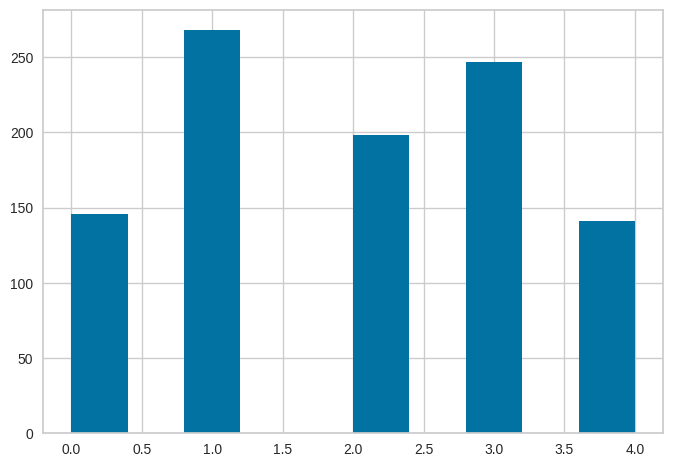

In [ ]:
get_config('X_train_transformed')['Col1'].hist()

<Axes: >

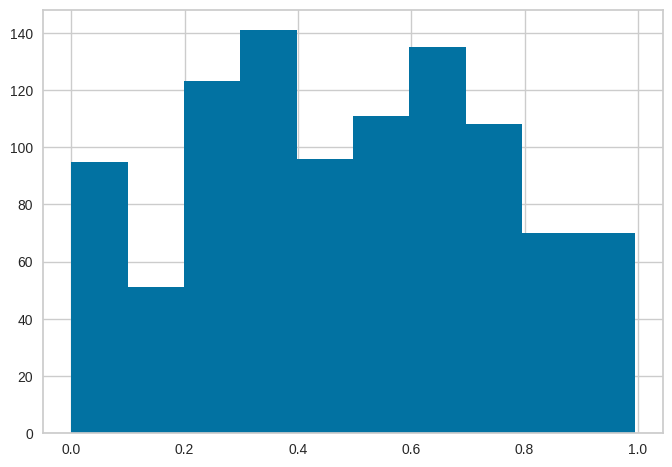

In [ ]:
get_config('X_train')['Col1'].hist()

In [ ]:
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pycaret.internal.patches.pyod.CBLOFForceToDouble
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


In [ ]:
iforest = create_model('iforest')

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
iforest

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0)

In [ ]:
create_model('iforest', contamination = 0.1)

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0)

In [ ]:
iforest_results = assign_model(iforest)
iforest_results

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Anomaly,Anomaly_Score
0,0.263995,0.764929,0.138424,0.935242,0.605867,0.518790,0.912225,0.608234,0.723782,0.733591,0,-0.024763
1,0.546092,0.653975,0.065575,0.227772,0.845269,0.837066,0.272379,0.331679,0.429297,0.367422,0,-0.083637
2,0.336714,0.538842,0.192801,0.553563,0.074515,0.332993,0.365792,0.861309,0.899017,0.088600,1,0.021481
3,0.092108,0.995017,0.014465,0.176371,0.241530,0.514724,0.562208,0.158963,0.073715,0.208463,1,0.044031
4,0.325261,0.805968,0.957033,0.331665,0.307923,0.355315,0.501899,0.558449,0.885169,0.182754,0,-0.026150
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.305055,0.656837,0.331665,0.822525,0.907127,0.882276,0.855732,0.584786,0.808640,0.242762,0,-0.076718
996,0.812627,0.864258,0.616604,0.167966,0.811223,0.938071,0.418462,0.472306,0.348347,0.671129,0,-0.059275
997,0.250967,0.138627,0.919703,0.461234,0.886555,0.869888,0.800908,0.530324,0.779433,0.234952,0,-0.058574
998,0.502436,0.936820,0.580062,0.540773,0.151995,0.059452,0.225220,0.242755,0.279385,0.538755,0,-0.089169


In [ ]:
plot_model(iforest, plot = 'tsne')